<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-Вывод" data-toc-modified-id="Промежуточный-Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Промежуточный Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li></ul></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span><ul class="toc-item"><li><span><a href="#Промежутоный-Вывод" data-toc-modified-id="Промежутоный-Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Промежутоный Вывод</a></span></li><li><span><a href="#Тестируем-модели" data-toc-modified-id="Тестируем-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Тестируем модели</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import os
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier 


from sklearn.metrics import f1_score

import time
import plotly.graph_objects as go

import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

import spacy
from tqdm import tqdm

                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB 2.0 MB/s eta 0:00:07
                                             0.1/12.8 MB 919.0 kB/s eta 0:00:14
                                              0.1/12.8 MB 1.1 MB/s eta 0:00:12
                                              0.2/12.8 MB 1.4 MB/s eta 0:00:10
                                              0.3/12.8 MB 1.3 MB/s eta 0:00:10
     -                                        0.4/12.8 MB 1.4 MB/s eta 0:00:09
     -                                        0.5/12.8 MB 1.6 MB/s eta 0:00:08
     --                                       0.7/12.8 MB 1.9 MB/s eta 0:00:07
     --                                       0.8/12.8 MB 2.0 MB/s eta 0:00:06
     ---                                      1.1/12.8 MB 2.3 MB/s eta 0:00:06
     ---                                      1.3/12.8 MB 2.4 MB/s eta 0:00:05
     ----                                     1.4/12.8 MB 

In [3]:
pth1 = 'D:\DDownloads/toxic_comments.csv'
pth2 = '/datasets/toxic_comments.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, parse_dates=[0], index_col=[0])
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, parse_dates=[0], index_col=[0])
else:
    print('Something is wrong')

In [4]:
df

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159446,""":::::And for the second time of asking, when ...",0
159447,You should be ashamed of yourself \n\nThat is ...,0
159448,"Spitzer \n\nUmm, theres no actual article for ...",0
159449,And it looks like it was actually you who put ...,0


In [5]:
df.sample(10)

,text,toxic
35917,Which page? The VDV one?,0
78991,See also Talk:Hamas#Intro for current negociat...,0
117232,This isn't a lie. this is the truth. Many ben...,0
155952,SOCK PUPPET MY A**. YOU IZAN ARMY OF WIKI USER...,1
8426,"""\n\nwhere are my insults? heres an insult for...",1
76330,"""\nI agree. It does seem like a copy and paste...",0
66725,See! this sums up your wiki and admin of wiki ...,1
79766,", since you've brought this issue up, it would...",0
6176,"""\n After looking at a few sources it seems th...",0
124666,You're right Joseph.. You asked me a question ...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [7]:
df.toxic.unique()

array([0, 1], dtype=int64)

In [8]:
df.toxic.value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

In [9]:
100*(df.toxic.value_counts()[1] / df.toxic.value_counts()[0])

11.310497114027363

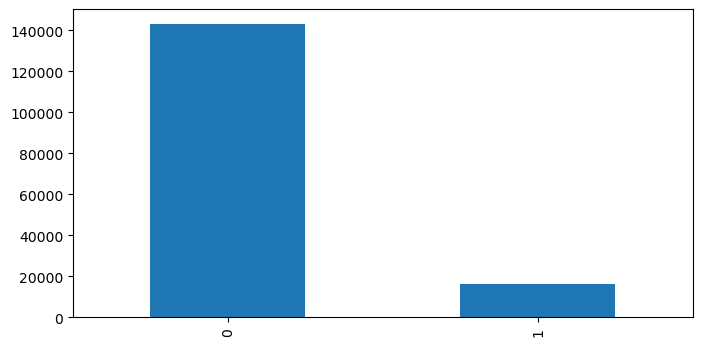

In [10]:
df.toxic.value_counts().plot(kind='bar', figsize=(8, 4));

Присутсвует сильный дизбаланс классов.

In [11]:
df.duplicated().sum()

0

дубликатов нету

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [13]:
tqdm.pandas()
df['text'] = df['text'].progress_apply(clean_text)

100%|██████████| 159292/159292 [00:10<00:00, 14641.91it/s]


In [14]:
df

,text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i am s...,0
2,hey man i am really not trying to edit war it ...,0
3,more i cannot make any real suggestions on imp...,0
4,you sir are my hero any chance you remember wh...,0
...,...,...
159446,and for the second time of asking when your vi...,0
159447,you should be ashamed of yourself that is a ho...,0
159448,spitzer umm theres no actual article for prost...,0
159449,and it looks like it was actually you who put ...,0


In [15]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
def spacy_lemm(sentence):
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc])

df['lemm_text'] = df['text'].progress_apply(spacy_lemm)

100%|██████████| 159292/159292 [20:50<00:00, 127.37it/s]


In [16]:
df

,text,toxic,lemm_text
0,explanation why the edits made under my userna...,0,explanation why the edit make under my usernam...
1,d aww he matches this background colour i am s...,0,d aww he match this background colour I be see...
2,hey man i am really not trying to edit war it ...,0,hey man I be really not try to edit war it jus...
3,more i cannot make any real suggestions on imp...,0,more I can not make any real suggestion on imp...
4,you sir are my hero any chance you remember wh...,0,you sir be my hero any chance you remember wha...
...,...,...,...
159446,and for the second time of asking when your vi...,0,and for the second time of ask when your view ...
159447,you should be ashamed of yourself that is a ho...,0,you should be ashamed of yourself that be a ho...
159448,spitzer umm theres no actual article for prost...,0,spitzer umm there s no actual article for pros...
159449,and it looks like it was actually you who put ...,0,and it look like it be actually you who put on...


### Промежуточный Вывод

В датасете содержится 159571 строка. В данных отсутствуют дубликаты и пропущенные значения. Два столбца наиболее важны: "toxic" и "text". Столбец "text" содержит текстовые записи, представляющие собой твиты. Столбец "toxic" содержит булевые значения, указывающие, является ли каждый твит токсичным или нет. Замечено, что около 90% твитов не имеют токсичного содержания. В ходе предобработки текстов с использованием регулярных выражений были подготовлены данные для последующего анализа.


## Обучение

In [17]:
RANDOM_STATE=12345

In [18]:
features = df.drop('toxic', axis=1)
target = df['toxic']

In [19]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, test_size = 0.3,
                                                                            random_state=RANDOM_STATE,
                                                                            stratify=target)

In [20]:
print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")
print(f"Количество строк в target_test по классам: {np.bincount(target_test)}")

Количество строк в target_train по классам: [100174  11330]
Количество строк в target_test по классам: [42932  4856]


In [21]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Уменьшим количество кроссвалидаций до 3 из-за размера выборки.

In [22]:
cv_counts = 3

### LogisticRegression

In [23]:
%%time

lr_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), min_df=3, max_df=0.9, use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words='english')),
    ('clf', LogisticRegression(random_state=RANDOM_STATE, max_iter=2000))])

lr_params = {'clf__C': [10],
          'clf__class_weight': ['balanced']}

lr_grid = GridSearchCV(estimator=lr_pipe, param_grid=lr_params, cv=cv_counts, scoring='f1', n_jobs=-1)
lr_grid.fit(features_train['lemm_text'], target_train)
lr_best_paramms = lr_grid.best_params_

CPU times: total: 1min 16s
Wall time: 1min 12s


In [24]:
print(lr_best_paramms)
print(lr_grid.best_score_)

{'clf__C': 10, 'clf__class_weight': 'balanced'}
0.7744551363156931


### LGBMClassifier

In [27]:
%%time

lgb_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), min_df=3, max_df=0.9, use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words='english')),
    ('clf', LGBMClassifier(random_state=RANDOM_STATE))])

lgb_params = {
  'clf__n_estimators': [200],
  'clf__learning_rate': [0.25],
  'clf__max_depth': [-1]}

lgb_grid = GridSearchCV(estimator=lgb_pipe, param_grid=lgb_params, cv=cv_counts, scoring='f1', n_jobs=-1)
lgb_grid.fit(features_train['lemm_text'], target_train)
lgb_best_params = lgb_grid.best_params_

[LightGBM] [Info] Number of positive: 11330, number of negative: 100174
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 7.229122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764062
[LightGBM] [Info] Number of data points in the train set: 111504, number of used features: 22392
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101611 -> initscore=-2.179455
[LightGBM] [Info] Start training from score -2.179455
CPU times: total: 4min 20s
Wall time: 3min 21s


In [28]:
print('Оптимальные параметры: ', lgb_best_params)
print(lgb_grid.best_score_)

Оптимальные параметры:  {'clf__learning_rate': 0.25, 'clf__max_depth': -1, 'clf__n_estimators': 200}
0.7698041732641386


## DecisionTreeClassifier

In [29]:
%%time
#долго грузит ячейка, возможно нужно будет сократитть гиперпараметры


# Создание пайплайна для DecisionTreeClassifier
dt_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_df=0.9, use_idf=1, smooth_idf=1, sublinear_tf=1, stop_words='english')),
    ('clf', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# Задание параметров для поиска по сетке
dt_params = {
    'clf__max_depth': [None],
    'clf__min_samples_split': [2, 5],
    'clf__class_weight': ['balanced']
}

# Поиск по сетке для модели DecisionTreeClassifier
dt_grid = GridSearchCV(estimator=dt_pipe, param_grid=dt_params, cv=cv_counts, scoring='f1', n_jobs=-1)
dt_grid.fit(features_train['lemm_text'], target_train)
dt_best_params = dt_grid.best_params_

CPU times: total: 6min 31s
Wall time: 12min 26s


In [30]:
print('Оптимальные параметры: ', dt_best_params)
print(dt_grid.best_score_)

Оптимальные параметры:  {'clf__class_weight': 'balanced', 'clf__max_depth': None, 'clf__min_samples_split': 5}
0.6256893988161175


In [31]:
# Результаты поиска по сетке для каждой модели
results = [
    {'Model': 'Logistic Regression', 'F1 Score': lr_grid.best_score_, 'Best Params': lr_best_paramms},
    {'Model': 'LightGBM', 'F1 Score': lgb_grid.best_score_, 'Best Params': lgb_best_params},
    {'Model': 'Decision Tree', 'F1 Score': dt_grid.best_score_, 'Best Params': dt_best_params},
    
]

# Создание DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False)

,Model,F1 Score,Best Params
0,Logistic Regression,0.774455,"{'clf__C': 10, 'clf__class_weight': 'balanced'}"
1,LightGBM,0.769804,"{'clf__learning_rate': 0.25, 'clf__max_depth':..."
2,Decision Tree,0.625689,"{'clf__class_weight': 'balanced', 'clf__max_de..."


### Промежутоный Вывод
 Итак, все наши модели кроме DecisionTreeClassifier показали достойный результат, выше 0.75 что соответсвует требованиям. Так же я хотел задействовать модель случайного леса, но модель обучалась так долго что мой ноут завис и я не смог его выключить. теперь протестируем 2наши лучшие  модели с лучшими гиперпараметрами  на тестовых данных

### Тестируем модели

#### LogisticRegression

In [32]:
# Создание пайплайна для LogisticRegression
lr_pipe_best = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_df=0.9, use_idf=1,
                              smooth_idf=1, sublinear_tf=1, stop_words='english')),
    ('clf', LogisticRegression(C=10, class_weight='balanced', random_state=RANDOM_STATE))
])

# Обучение модели LogisticRegression на обучающих данных
start_time_train = time.time()
lr_pipe_best.fit(features_train['lemm_text'], target_train)
end_time_train = time.time()

lr_pipe_time = end_time_train - start_time_train

# Предсказание на тестовых данных
start_time = time.time()
lr_predictions = lr_pipe_best.predict(features_test['lemm_text'])
end_time = time.time()

prediction_time_lr = end_time - start_time

# Вычисление меры F1 на тестовых данных
f1_lr = f1_score(target_test, lr_predictions)

print("F1 Score на тестовых данных (Logistic Regression):", f1_lr)
print('Время обучения модели' ,lr_pipe_time)
print('Время предсказания модели' ,prediction_time_lr)

F1 Score на тестовых данных (Logistic Regression): 0.7794519162706036
Время обучения модели 33.73616552352905
Время предсказания модели 9.70903468132019


In [33]:
# Получение списка слов после векторизации
feature_names_lr = lr_pipe_best.named_steps['tfidf'].get_feature_names_out().tolist()

# Получение коэффициентов важности для логистической регрессии
coef_lr = lr_pipe_best.named_steps['clf'].coef_.tolist()[0]

# Соединение слов и коэффициентов важности
words_and_importances = list(zip(feature_names_lr, coef_lr))

# Сортировка по абсолютному значению коэффициентов важности
sorted_words_and_importances = sorted(words_and_importances, key=lambda x: abs(x[1]), reverse=True)

print("Слова и их коэффициенты важности для классификации (Logistic Regression):")
for word, importance in sorted_words_and_importances[:50]:
    print(f"{word}: {importance}")


Слова и их коэффициенты важности для классификации (Logistic Regression):
fuck: 40.71273207005088
fucking: 30.477807259152176
shit: 28.13194063571821
idiot: 27.703624428387936
stupid: 25.18419810776293
bullshit: 23.55981025700596
suck: 22.522902033789254
asshole: 22.09718276245302
ass: 21.934253554032416
bitch: 21.72632099633147
faggot: 19.401317523610743
moron: 19.158492078852134
dick: 19.09821485915939
cunt: 18.456457939251763
crap: 18.346184060531094
jerk: 15.880100006080168
pathetic: 15.240301516171023
penis: 15.230051228238345
bastard: 15.18448591270869
nigger: 14.001878952051676
idiotic: 13.85238938921949
loser: 13.752123887709228
gay: 13.238078534803652
hell: 13.206630101171553
cock: 12.485664895684947
fucker: 12.378043246912652
dickhead: 11.842402439169948
dumb: 11.831359308362106
motherfucker: 11.638492949699529
shut: 11.60182069574648
ignorant: 11.593725394480341
dumbass: 11.445875412646574
damn: 11.367500158504598
pussy: 11.22999842522631
retarded: 11.151611660441889
racist:

#### LGBMClassifier

In [34]:
best_lgb_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_df=0.9, use_idf=1,
                              smooth_idf=1, sublinear_tf=1, stop_words='english')),
    ('clf', LGBMClassifier(learning_rate=0.25, max_depth=-1, n_estimators=200, random_state=RANDOM_STATE))
])

# Обучение модели на обучающей выборке
start_time_train = time.time()
best_lgb_pipe.fit(features_train['lemm_text'], target_train)
end_time_train = time.time()

lgb_pipe_time = end_time_train - start_time_train

# Предсказание на тестовой выборке
start_time = time.time()
lgb_predictions = best_lgb_pipe.predict(features_test['lemm_text'])
end_time = time.time()

prediction_time_lgb = end_time - start_time

# Вычисление меры F1
f1_lgb = f1_score(target_test, lgb_predictions)

print("F1 Score на тестовых данных (LGBMClassifier):", f1_lgb)
print('Время обучения модели' ,lgb_pipe_time)
print('Время предсказания модели' ,prediction_time_lgb)

[LightGBM] [Info] Number of positive: 11330, number of negative: 100174
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 10.712802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764062
[LightGBM] [Info] Number of data points in the train set: 111504, number of used features: 22392
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101611 -> initscore=-2.179455
[LightGBM] [Info] Start training from score -2.179455
F1 Score на тестовых данных (LGBMClassifier): 0.7732358986069878
Время обучения модели 91.4846920967102
Время предсказания модели 8.468631267547607


In [35]:
# Получение списка слов после векторизации
feature_names = best_lgb_pipe.named_steps['tfidf'].get_feature_names_out().tolist()

# Вывод наиболее важных слов
important_words = [feature_names[i] for i in np.argsort(best_lgb_pipe.named_steps['clf'].feature_importances_)[::-1]]
important_importances = [best_lgb_pipe.named_steps['clf'].feature_importances_[i] for i in np.argsort(best_lgb_pipe.named_steps['clf'].feature_importances_)[::-1]]

print("Наиболее важные слова и их важности для классификации:")
for word, importance in zip(important_words[:50], important_importances[:50]):
    print(f"{word}: {importance}")

Наиболее важные слова и их важности для классификации:
shit: 29
stupid: 29
idiot: 28
fuck: 28
article: 24
hell: 21
suck: 21
fucking: 21
crap: 21
moron: 20
asshole: 19
bullshit: 19
dick: 18
cunt: 17
just: 17
bitch: 17
gay: 17
think: 16
ass: 16
kill: 16
faggot: 16
nazi: 16
pathetic: 15
racist: 15
jerk: 15
penis: 15
die: 15
damn: 14
hate: 14
say: 14
page: 14
stop: 14
wikipedia: 14
block: 14
nigger: 13
like: 13
dumb: 13
retarded: 13
talk: 13
remove: 13
shut: 13
loser: 12
make: 12
bastard: 12
fool: 12
good: 12
point: 12
know: 12
ignorant: 12
motherfucker: 11


DecisionTreeClassifier я не стал тестировать так как у меня в черновике она показала результат 0.71, а время обучения 11 минут что не соответсвует нашим ожиданиям

In [37]:
final_results = [
    {'Model': 'Logistic Regression', 'F1 Score': f1_lr, 'Train Time (s)': lr_pipe_time, 'Prediction Time (s)': prediction_time_lr},
    {'Model': 'LightGBM', 'F1 Score': f1_lgb, 'Train Time (s)': lgb_pipe_time, 'Prediction Time (s)': prediction_time_lgb},

]

# Создание DataFrame
final_results_df = pd.DataFrame(final_results)

# Вывод таблицы
final_results_df

,Model,F1 Score,Train Time (s),Prediction Time (s)
0,Logistic Regression,0.779452,33.736166,9.709035
1,LightGBM,0.773236,91.484692,8.468631


## Выводы

Для исследования интернет-магазина "Викишоп" был проведен анализ, который выявил, что 90% записей не содержат токсичного контента. Мы также выполнили предварительную обработку текста с помощью регулярных выражений и подготовили данные для последующего анализа. В дальнейшем, мы выбрали три модели, создали для них пайплайны и с применением кросс-валидации нашли оптимальные гиперпараметры и оценили метрику F1. После этого мы произвели выбор лучших моделей для дальнейшего тестирования, и из них лучшей оказалась модель логистической регрессии, с результатом F1 0.77, что говорит о высокой точности предсказаний данной модели. Это означает, что модель логистической регрессии способна хорошо разделять токсичные и нетоксичные тексты, и метрика F1 в 0.77 подтверждает высокую сбалансированность между полнотой и точностью предсказаний.